In [1]:
# This file is for quick plotting of histograms of particle properties, to debug potential issues with cuts etc.
import torch
import sys
import os.path as osp
import os
import sys
import numpy as np
from src.dataset.dataset import SimpleIterDataset, EventDataset
from src.utils.utils import to_filelist
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pickle
import torch
import os
import matplotlib.pyplot as plt
from src.utils.paths import get_path
from src.utils.utils import CPU_Unpickler
from pathlib import Path
import fastjet
from src.dataset.dataset import EventDataset
import numpy as np
from src.plotting.plot_coordinates import plot_coordinates

matplotlib.rc('font', size=13)
from src.plotting.plot_event import plot_event_comparison
from src.dataset.functions_data import concat_events
from src.utils.paths import get_path
from dotenv import load_dotenv
load_dotenv()


True

In [2]:
def remove_from_list(lst):
    out = []
    for item in lst:
        if item in ["hgcal", "data.txt", "test_file.root"]:
            continue
        out.append(item)
    return out

#path = "/eos/user/g/gkrzmanc/jetclustering/data/SVJ_std_UL2018_scouting_test_large/SVJ_mMed-700GeV_mDark-20GeV_rinv-0.7_alpha-peak"
def get_iter(path_to_ds):
    return iter()

In [3]:

filename_parton_level = get_path("train/Eval_eval_19March2025_2025_03_19_22_08_15/eval_1.pkl", "results", fallback=True)
result_parton_level = CPU_Unpickler(open(filename_parton_level, "rb")).load()
print(result_parton_level["filename"])
dataset_parton_level = EventDataset.from_directory(result_parton_level["filename"], mmap=True, model_output_file=filename_parton_level, parton_level=True)

filename_gen_level = get_path("train/Eval_eval_19March2025_2025_03_19_22_08_18/eval_1.pkl", "results", fallback=True)
result_gen_level = CPU_Unpickler(open(filename_gen_level, "rb")).load()
dataset_gen_level = EventDataset.from_directory(result_gen_level["filename"], mmap=True, model_output_file=filename_gen_level, gen_level=True)

filename_pfcands_level = get_path("train/Eval_eval_19March2025_2025_03_19_22_08_22/eval_1.pkl", "results", fallback=True)
result_pfcands_level = CPU_Unpickler(open(filename_pfcands_level, "rb")).load()
dataset_pfcands_level = EventDataset.from_directory(result_pfcands_level["filename"], mmap=True, model_output_file=filename_pfcands_level)


/work/gkrzmanc/jetclustering/preprocessed_data/Feb26_2025_E1000_N500_full/PFNano_s-channel_mMed-1000_mDark-20_rinv-0.5_alpha-peak_13TeV-pythia8_n-1000


/work/gkrzmanc/jetclustering/code/src/utils/utils.py:91: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return lambda b: torch.load(io.BytesIO(b), map_location='cpu')


Batch idx torch.Size([501263]) tensor([3131, 3131, 3131, 3131, 3131, 3131, 3131, 3131, 3131, 3131, 3131, 3131,
        3131, 3131, 3131, 3131, 3131, 3131, 3131, 3131, 3131, 3131, 3131, 3131,
        3131, 3131, 3131, 3131, 3131, 3131, 3131, 3131, 3131, 3132, 3132, 3132,
        3132, 3132, 3132, 3132, 3132, 3132, 3132, 3132, 3132, 3132, 3132, 3132,
        3132, 3132, 3132, 3132, 3132, 3132, 3132, 3132, 3132, 3132, 3132, 3132,
        3132, 3132, 3132, 3133, 3133, 3133, 3133, 3133, 3133, 3133, 3133, 3133,
        3133, 3134, 3134, 3134, 3134, 3134, 3134, 3134, 3134, 3134, 3134, 3134,
        3134, 3134, 3134, 3134, 3134, 3134, 3134, 3134, 3134, 3134, 3134, 3134,
        3134, 3134, 3134, 3134, 3134, 3135, 3135, 3135, 3135, 3135, 3135, 3135,
        3135, 3135, 3135, 3135, 3135, 3135, 3135, 3135, 3135, 3135, 3135, 3135,
        3135, 3135, 3135, 3136, 3136, 3136, 3136, 3136, 3136, 3136, 3136, 3136,
        3136, 3136, 3136, 3136, 3136, 3136, 3136, 3136, 3136, 3136, 3136, 3136,
        3

In [4]:
dataset_gen_level[0]

In [5]:
dataset_parton_level[0]

In [6]:
dataset_pfcands_level[0]

In [15]:
# make a histogram of the number of particles within R=0.8 of dark quarks
data = {
    "PL": [],
    "GL": [],
    "PFCands": []
}
R = 2.0
from tqdm import tqdm
for i in tqdm(range(200)):
    event = dataset_pfcands_level[i]
    particles = event.pfcands
    data["PFCands"] += [0]
    for dq in range(len(event.matrix_element_gen_particles)):
        coords = event.matrix_element_gen_particles.eta[dq], event.matrix_element_gen_particles.phi[dq]
        for p in range(len(particles)):
            if np.sqrt((particles.eta[p] - coords[0])**2 + (particles.phi[p] - coords[1])**2) < R:
                data["PFCands"][-1] += 1
    event = dataset_parton_level[i]
    particles = event.final_parton_level_particles
    data["PL"] += [0]
    for dq in range(len(event.matrix_element_gen_particles)):
        coords = event.matrix_element_gen_particles.eta[dq], event.matrix_element_gen_particles.phi[dq]
        for p in range(len(particles)):
            if np.sqrt((particles.eta[p] - coords[0])**2 + (particles.phi[p] - coords[1])**2) < R:
                data["PL"][-1] += 1
    particles = event.final_gen_particles
    data["GL"] += [0]
    for dq in range(len(event.matrix_element_gen_particles)):
        coords = event.matrix_element_gen_particles.eta[dq], event.matrix_element_gen_particles.phi[dq]
        for p in range(len(particles)):
            if np.sqrt((particles.eta[p] - coords[0])**2 + (particles.phi[p] - coords[1])**2) < 0.8:
                data["GL"][-1] += 1

  0%|          | 0/200 [00:00<?, ?it/s]/tmp/ipykernel_22622/2504941977.py:16: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  if np.sqrt((particles.eta[p] - coords[0])**2 + (particles.phi[p] - coords[1])**2) < R:
/tmp/ipykernel_22622/2504941977.py:24: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  if np.sqrt((particles.eta[p] - coords[0])**2 + (particles.phi[p] - coords[1])**2) < R:
/tmp/ipykernel_22622/2504941977.py:31: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  if np.sqrt((particles.eta[p] - coords[0])**2 + (particles.phi[p] - coords[1])**2) < 0.8:
100%|██████████| 200/200 [00:11<00:00, 17.44it/s]


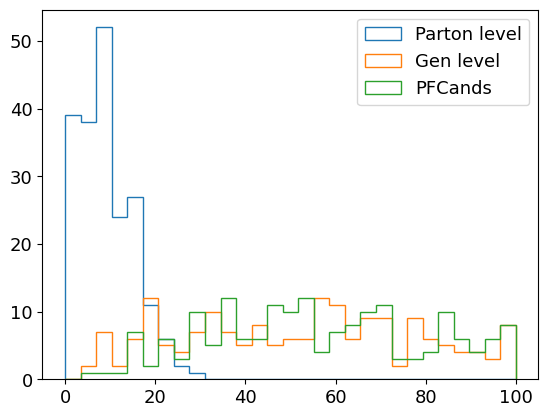

In [14]:
fig, ax = plt.subplots()
bins = np.linspace(0, 100, 30)
ax.hist(data["PL"], bins=bins, histtype="step", label="Parton level")
ax.hist(data["GL"], bins=bins, histtype="step", label="Gen level")
ax.hist(data["PFCands"], bins=bins, histtype="step", label="PFCands")
ax.legend()
fig.show()

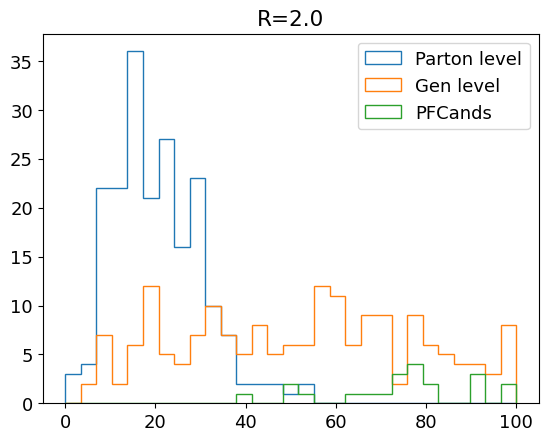

In [16]:
fig, ax = plt.subplots()
bins = np.linspace(0, 100, 30)
ax.hist(data["PL"], bins=bins, histtype="step", label="Parton level")
ax.hist(data["GL"], bins=bins, histtype="step", label="Gen level")
ax.hist(data["PFCands"], bins=bins, histtype="step", label="PFCands")
ax.legend()
ax.set_title("R=2.0")
fig.show()